Veer Khosla

CS 251: Data Analysis and Visualization

Fall 2023

Project 4: Principal Component Analysis

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pca import PCA

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Analyzing the results of PCA

In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data

In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).

You should see (with better formatting):

```
	sepal_length	sepal_width	petal_length	petal_width
0	5.1	3.5	1.4	0.2
1	4.9	3.0	1.4	0.2
2	4.7	3.2	1.3	0.2
3	4.6	3.1	1.5	0.2
4	5.0	3.6	1.4	0.2
```

In [26]:
iris_df = pd.read_csv('data/iris.csv')

numeric_df = iris_df.drop(columns=["species"])
print(numeric_df.head())

   sepalLength  sepalWidth  petalLength  petalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2


### 3b. Apply PCA to Iris

You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.

You should normalize the dataset when performing your PCA projection.

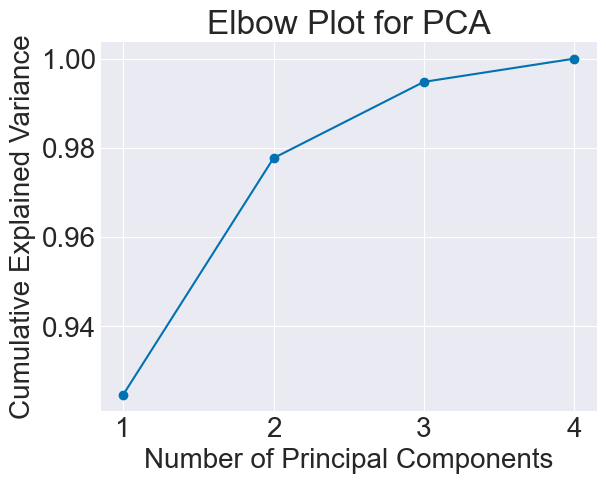

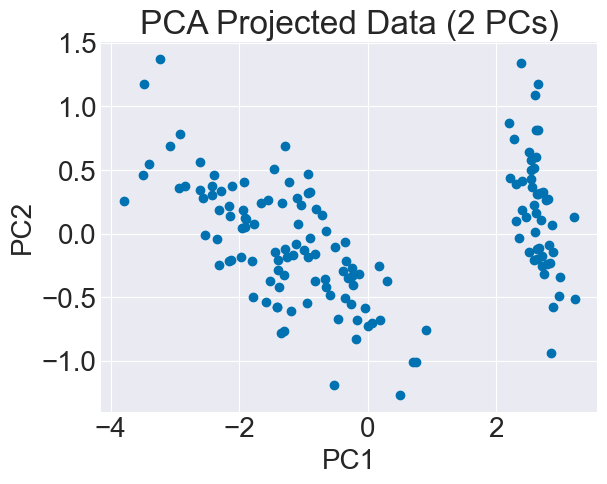

In [27]:
numeric_df = iris_df.drop(columns=["species"])

mean_centered_data = numeric_df - numeric_df.mean()

cov_matrix = np.cov(mean_centered_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.show()

num_pcs_to_preserve = 2

projection_matrix = eigenvectors[:, :num_pcs_to_preserve]
projected_data = np.dot(mean_centered_data, projection_matrix)

plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projected Data (2 PCs)')
plt.show()


I chose to preserve 3 PC's because we lose minimal information from the dataset while also reducing dimensionality significantly.


### 3c. Dropping different pairs of principal components

In the cell below, create a "high quality" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

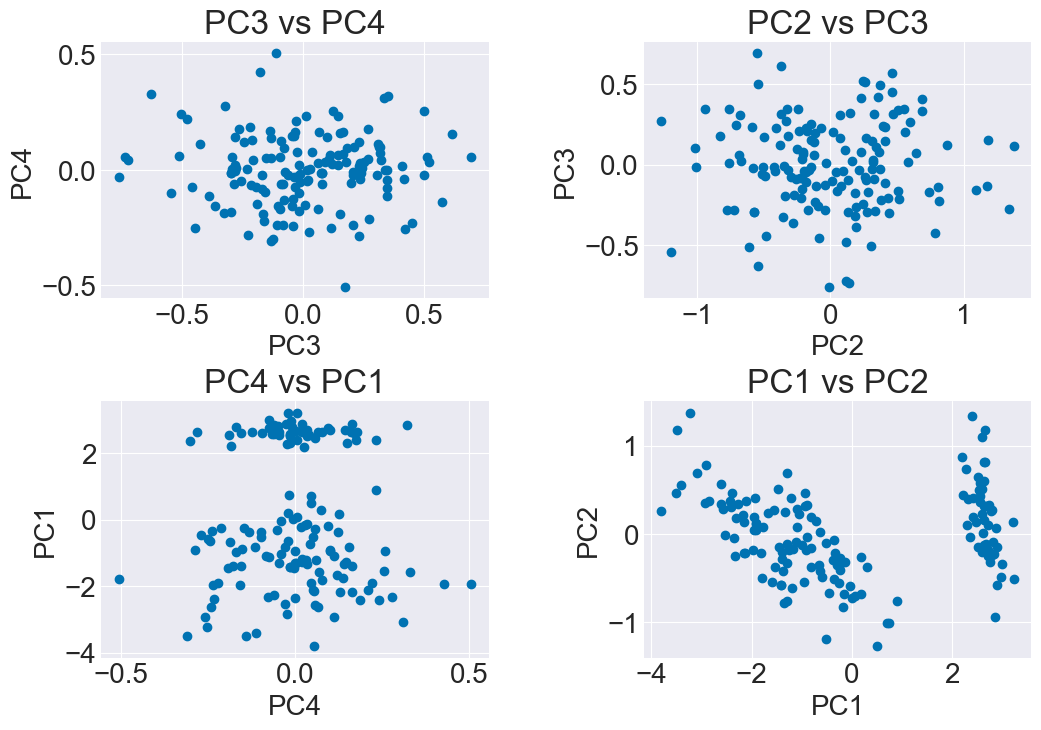

In [28]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

def project_data(data, pcs):
    projection_matrix = eigenvectors[:, pcs]
    projected_data = np.dot(mean_centered_data, projection_matrix)
    return projected_data

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

pc_combinations = [[2, 3], [1, 2], [3, 0], [0, 1]]
titles = ["PC3 vs PC4", "PC2 vs PC3", "PC4 vs PC1", "PC1 vs PC2"]

for i, (pcs, title) in enumerate(zip(pc_combinations, titles)):
    projected_data = project_data(mean_centered_data, pcs)
    ax = axes[i // 2, i % 2]
    ax.scatter(projected_data[:, 0], projected_data[:, 1])
    ax.set_xlabel(f'PC{pcs[0] + 1}')
    ax.set_ylabel(f'PC{pcs[1] + 1}')
    ax.set_title(title)

plt.show()

### 3d. Questions

**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:** we see how the dataset's variance is different depending on the two PC's being examined. Likewise, we see how we can reduce dimensionality while losing as little information about the dataset as possible.

### 3e. Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, apply PCA on the Iris dataset **without any normalization** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepal_length`, `sepal_width` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your `sepal_length`, `sepal_width` plot created one cell above — including the data range and center).

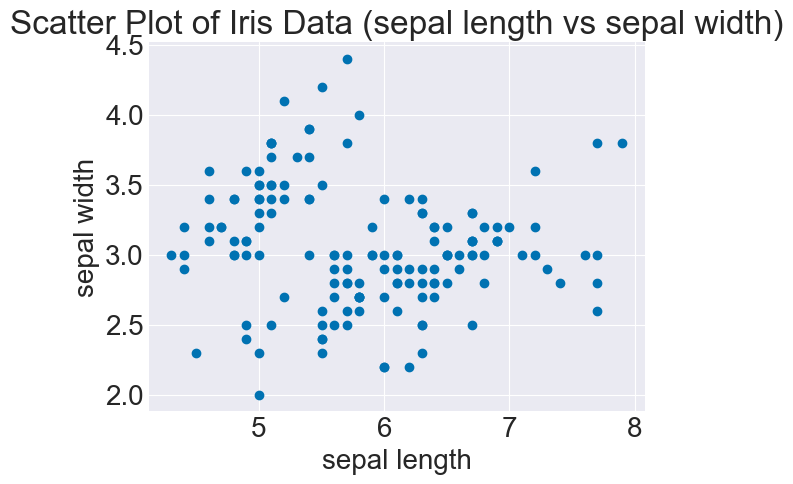

In [29]:
iris_data = pd.read_csv("data/iris.csv")

plt.scatter(iris_data["sepalLength"], iris_data["sepalWidth"])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Scatter Plot of Iris Data (sepal length vs sepal width)")
plt.show()

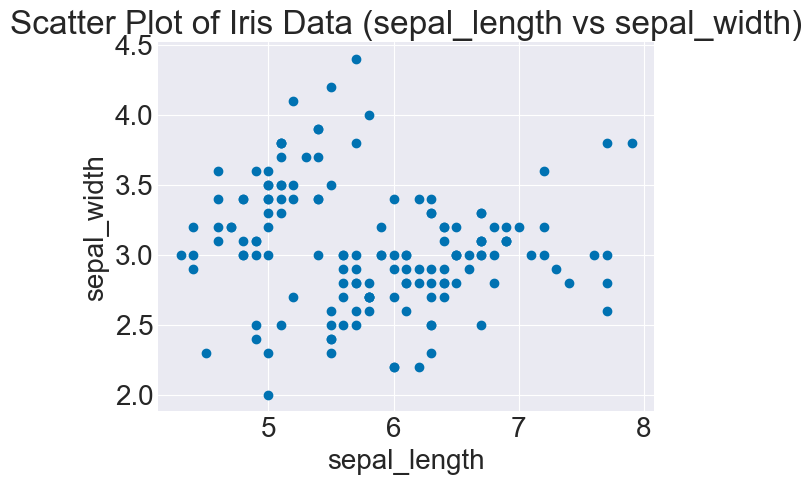

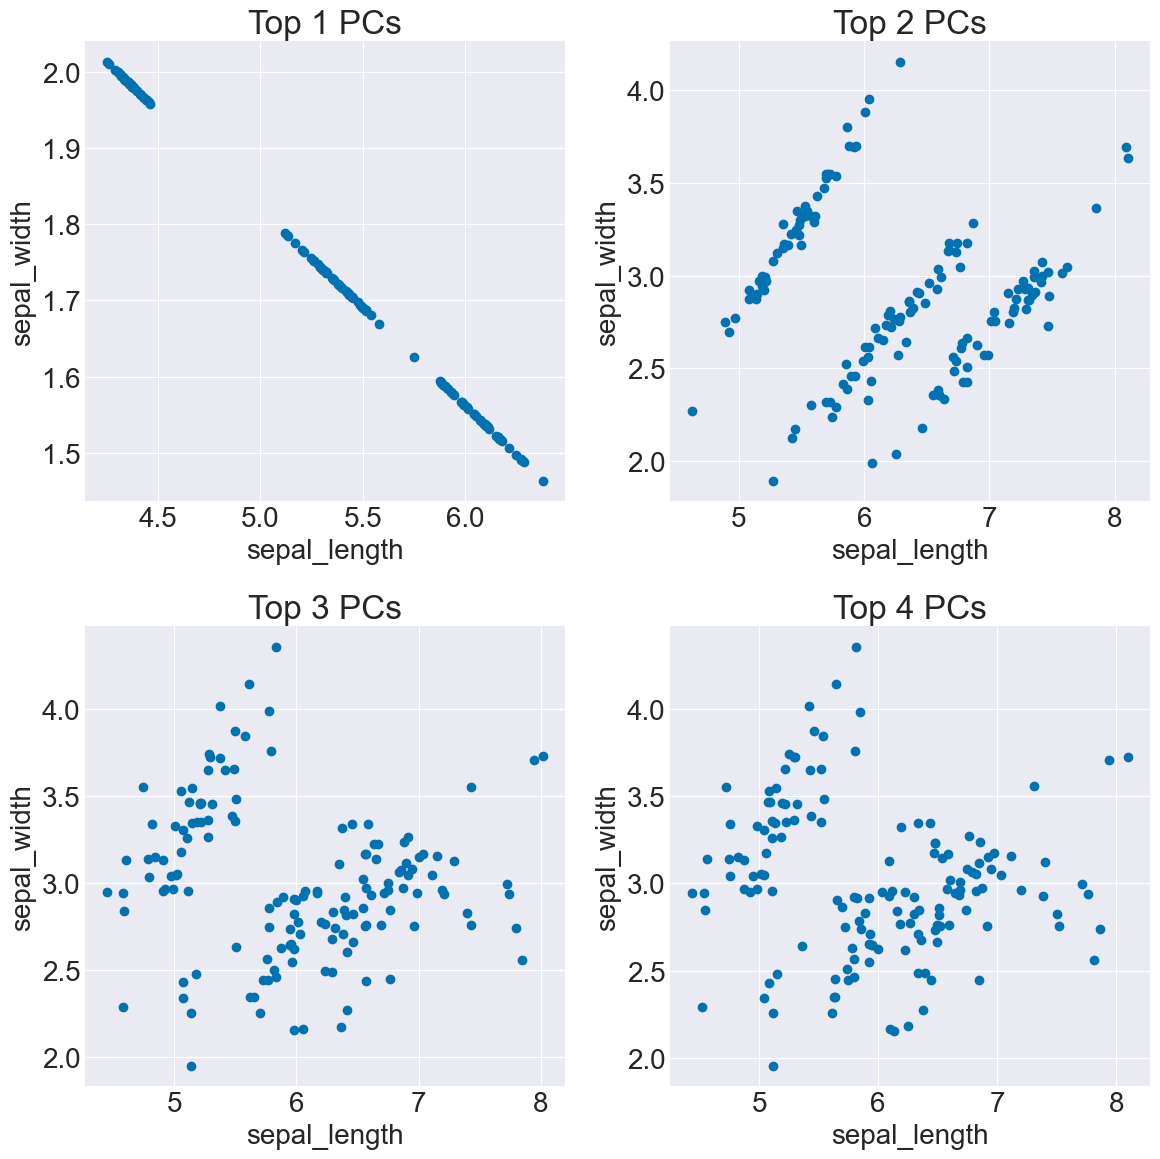

In [30]:
# Load the Iris dataset
iris_data = pd.read_csv("data/iris.csv")

# Create the PCA instance
iris_pca = PCA(iris_data)

# Run PCA once on all data variables without normalization
iris_pca.pca_all_vars(normalize_dataset=False)

# Scatter plot of sepal_length vs sepal_width (original data)
plt.scatter(iris_data["sepalLength"], iris_data["sepalWidth"])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("Scatter Plot of Iris Data (sepal_length vs sepal_width)")
plt.show()

# Perform PCA on the Iris dataset with all variables and create a 2x2 grid of scatter plots
# showing the data reconstruction of the 1st two data variables (sepal_length, sepal_width)
# when keeping the top 1, 2, 3, or 4 (all) principal components.
top_pcs = [1, 2, 3, 4]
plt.figure(figsize=(12, 12))

# Call pca_project before pca_then_project_back
iris_pca.pca_project(pcs_to_keep=4)  # Project onto all 4 PCs

for i, top_k in enumerate(top_pcs, start=1):
    reconstructed_data = iris_pca.pca_then_project_back(iris_pca.A_proj, top_k)

    plt.subplot(2, 2, i)
    plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1])
    plt.xlabel("sepal_length")
    plt.ylabel("sepal_width")
    plt.title(f"Top {top_k} PCs")

plt.tight_layout()
plt.show()


### 3f. Questions

**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:** The top right grid (1 PC) does a terrible job at preserving properties of the original data. 2 PC's is not much better but at least is oriented in the right direction. 3 and 4 PC's have little difference, and they both reflect the original data very well. We could drop PC 4 and still match up with the original data very well. This also reflects my elbow plot above, where I chose to preserve 3 PC's as well

### 3g. Implement loading plot

To visualize how the top two principal components relate to original data variables, implement `loading_plot` in `pca.py`.

### 3h. Questions

**Question 10:** Call your `loading_plot` method to generate a loading plot of the Iris dataset. What do the loadings tell us what the first two PCs measure, with respect to the original data axes?

**Question 11:** What do the loadings tell us about correlations among the original data axes?

**Answer 10:** The loadings tell us the direction and length of each variable, indicating its contribution to the corresponding PC


**Answer 11:** 
The loadings in a PCA loading plot show the direction, magnitude, and correlations among the original data axes, with similar directions indicating positive correlations and opposite directions indicating negative correlations

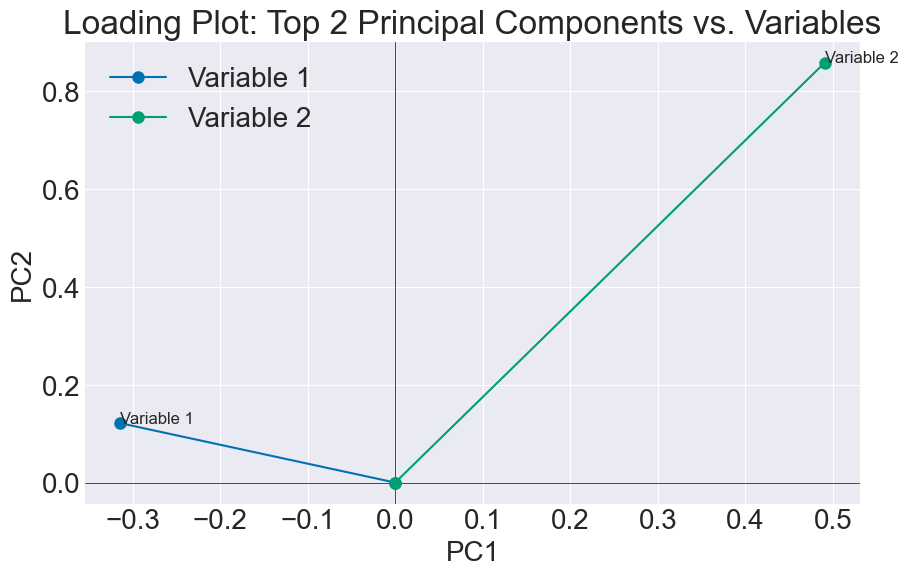

In [45]:
iris_pca.loading_plot()

## Task 4: Eigenfaces — PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a. Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

*More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/*

In [34]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b. Look at the face data

In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

Run the function to create the plot of the faces below.

**Note:**
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

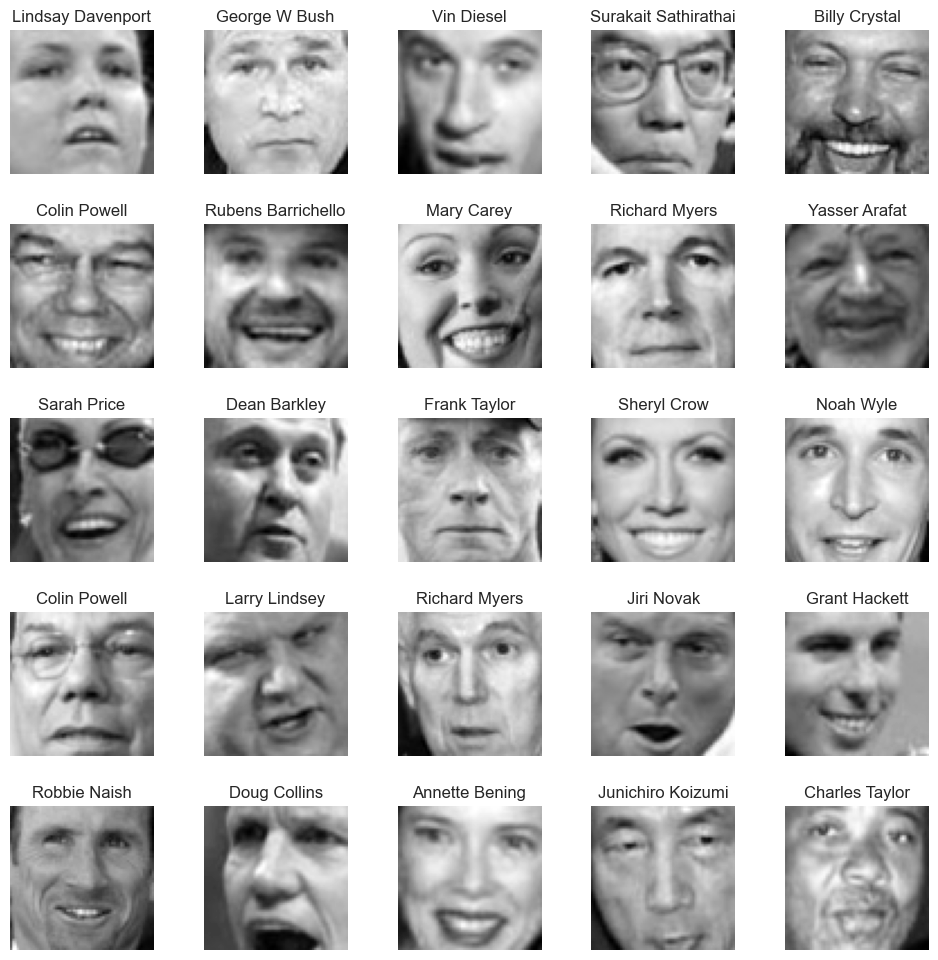

In [35]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))

    for i in range(25):
        row, col = divmod(i, 5)
        axes[row, col].imshow(face_imgs[i], cmap=plt.get_cmap('gray'))
        axes[row, col].set_title(face_names[i], fontsize = 12)
        axes[row, col].axis('off')
    plt.tight_layout()

face_plot(face_imgs, face_names)

### 4c. Visualize the "mean face"

Take the mean face image across the dataset and show it below.

**Note:** Use the same `cmap` parameter as above and turn off x and y tick marks.

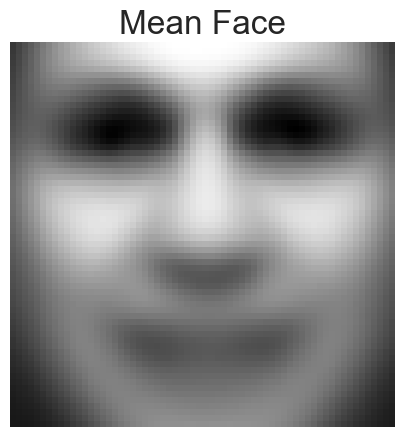

In [36]:
mean_face = np.mean(face_imgs, axis=0)

plt.figure(figsize=(5, 5))
plt.imshow(mean_face, cmap=plt.get_cmap('gray'))
plt.title("Mean Face")
plt.axis('off')
plt.show()

### 4d. Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [37]:
# Your reshape code here
num_samples, img_height, img_width = face_imgs.shape
face_imgs_vec = face_imgs.reshape(num_samples, img_height * img_width)

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e. Perform PCA on preprocessed face data

Create pandas DataFrame object that holds the face data then run PCA on the face dataset. The header names of consecutive integers `0, 1, ..., 4095` are fine. For the `vars` parameter in the `pca` method, pass in a Python list of ints (`0, 1, ..., 4095`).

**Note:**
- This is not a "toy" dataset so it might take a few minutes for the PCA to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [63]:
import time

face_data = pd.DataFrame(face_imgs_vec)

start_time = time.time()
face_pca = PCA(face_df)
face_pca.pca(list(range(face_data.shape[1])))
end_time = time.time()

print(f"Time elapsed for PCA: {end_time - start_time} seconds")

Time elapsed for PCA: 34.022047996520996 seconds


### 4f. Make face PCA elbow plot

Make an elbow plot of the PCA results.

You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below to **only show a reasonable number of PCs** in order to focus on the curve before it plateaus.

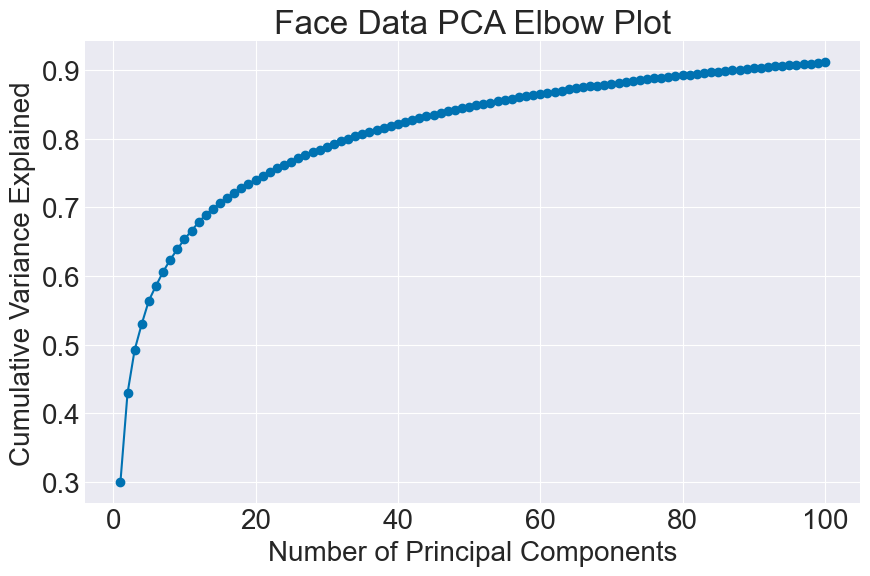

In [40]:
num_pcs_to_plot = min(100, len(face_pca.e_vals))

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_pcs_to_plot + 1), face_pca.cum_var[:num_pcs_to_plot], marker='o', markersize=6)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Face Data PCA Elbow Plot')
plt.grid(True)

plt.show()

### 4g. Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%

Outline of the general process:
1. For each of the above number of PCs, project them back onto the original data space.
2. Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
3. Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [81]:
def make_imgs(reconstructed_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    img_size = int(np.sqrt(reconstructed_imgs.shape[1]))
    inflated_imgs = reconstructed_imgs.reshape(-1, img_size, img_size)
    return inflated_imgs

#### 50% variance face grid

num_pcs_50:  4


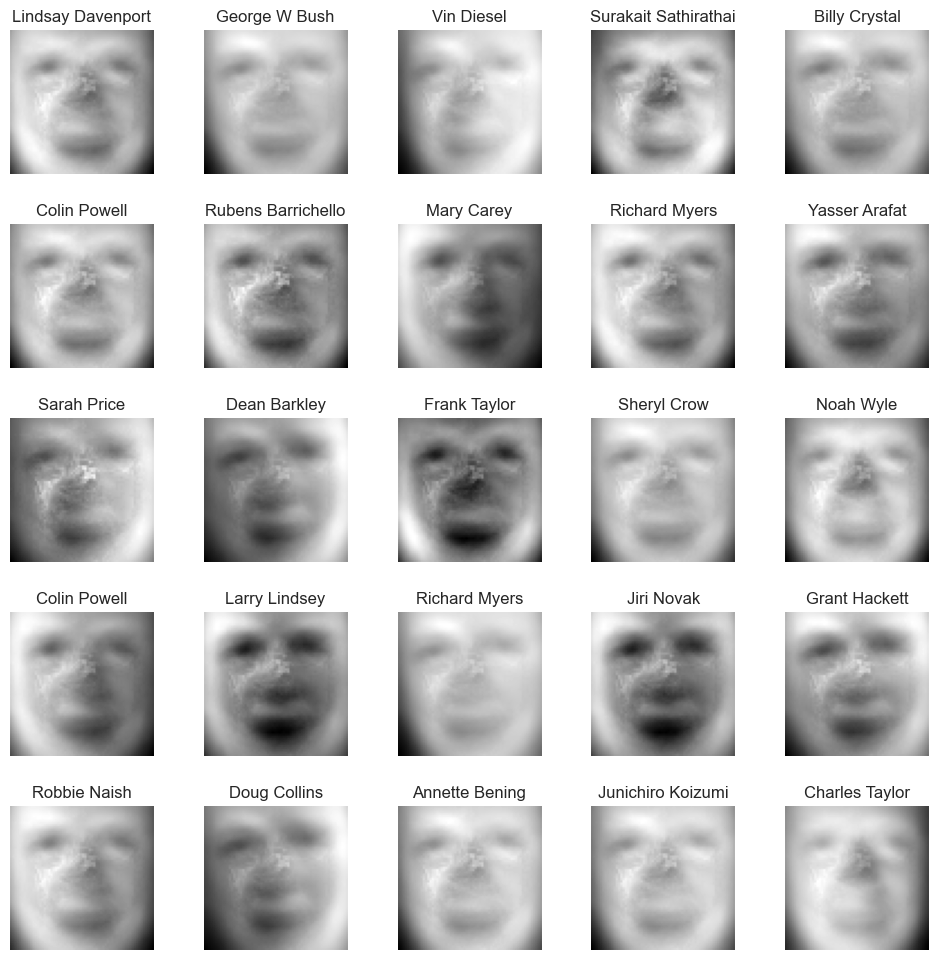

In [82]:
num_pcs_50 = face_pca.accounted_variance(0.5)
print("num_pcs_50: ", num_pcs_50)
reconstructed_data_50 = face_pca.pca_then_project_back(face_data, num_pcs_50)
inflated_imgs_50 = make_imgs(reconstructed_data_50)
face_plot(inflated_imgs_50, face_names)

#### 70% variance face grid

num_pcs_70:  15


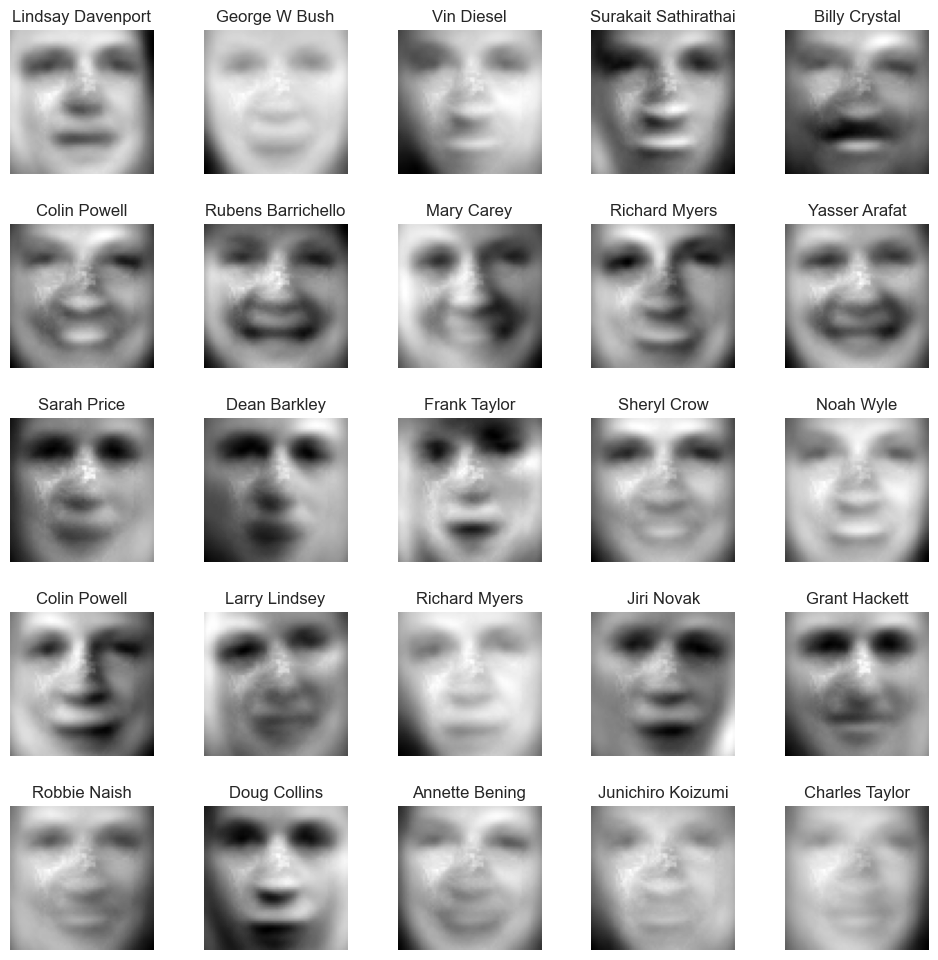

In [83]:
num_pcs_70 = face_pca.accounted_variance(0.7)
print("num_pcs_70: ", num_pcs_70)
reconstructed_data_70 = face_pca.pca_then_project_back(face_data, num_pcs_70)
inflated_imgs_70 = make_imgs(reconstructed_data_70)
face_plot(inflated_imgs_70, face_names)

#### 80% variance face grid

num_pcs_80:  34


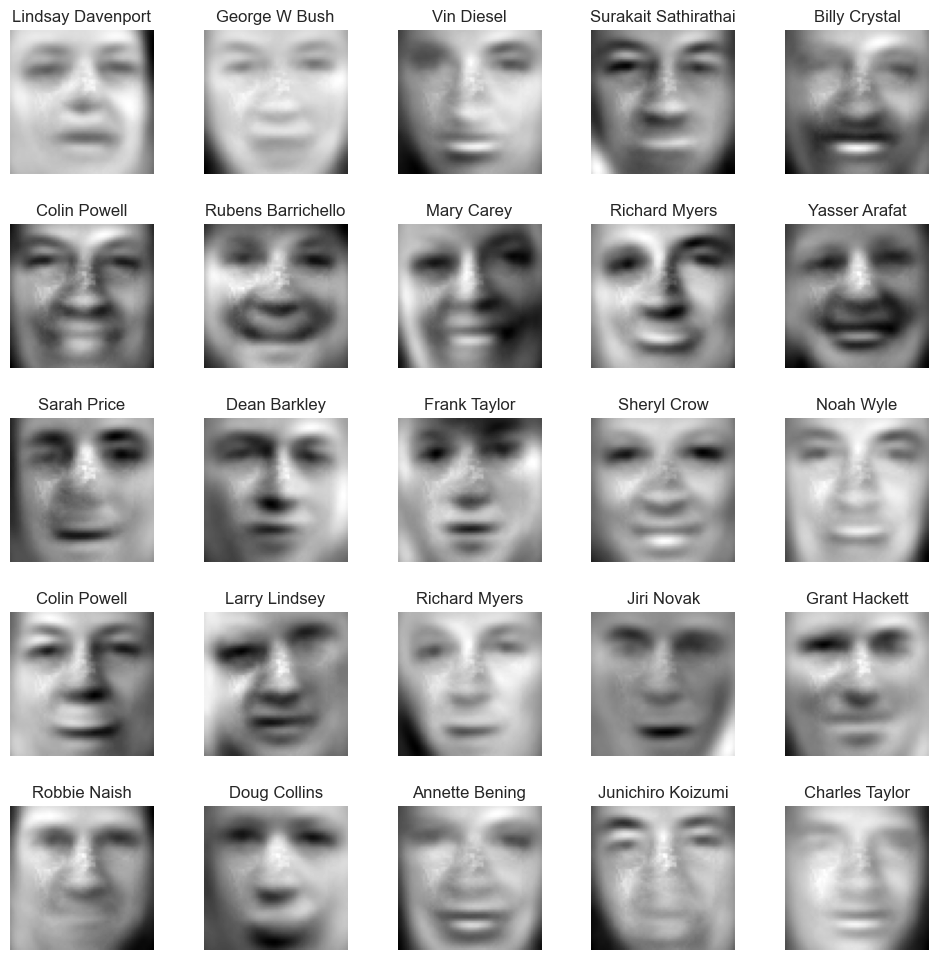

In [84]:
num_pcs_80 = face_pca.accounted_variance(0.8)
print("num_pcs_80: ", num_pcs_80)
reconstructed_data_80 = face_pca.pca_then_project_back(face_data, num_pcs_80)
inflated_imgs_80 = make_imgs(reconstructed_data_80)
face_plot(inflated_imgs_80, face_names)

#### 95% variance face grid

num_pcs_95:  181


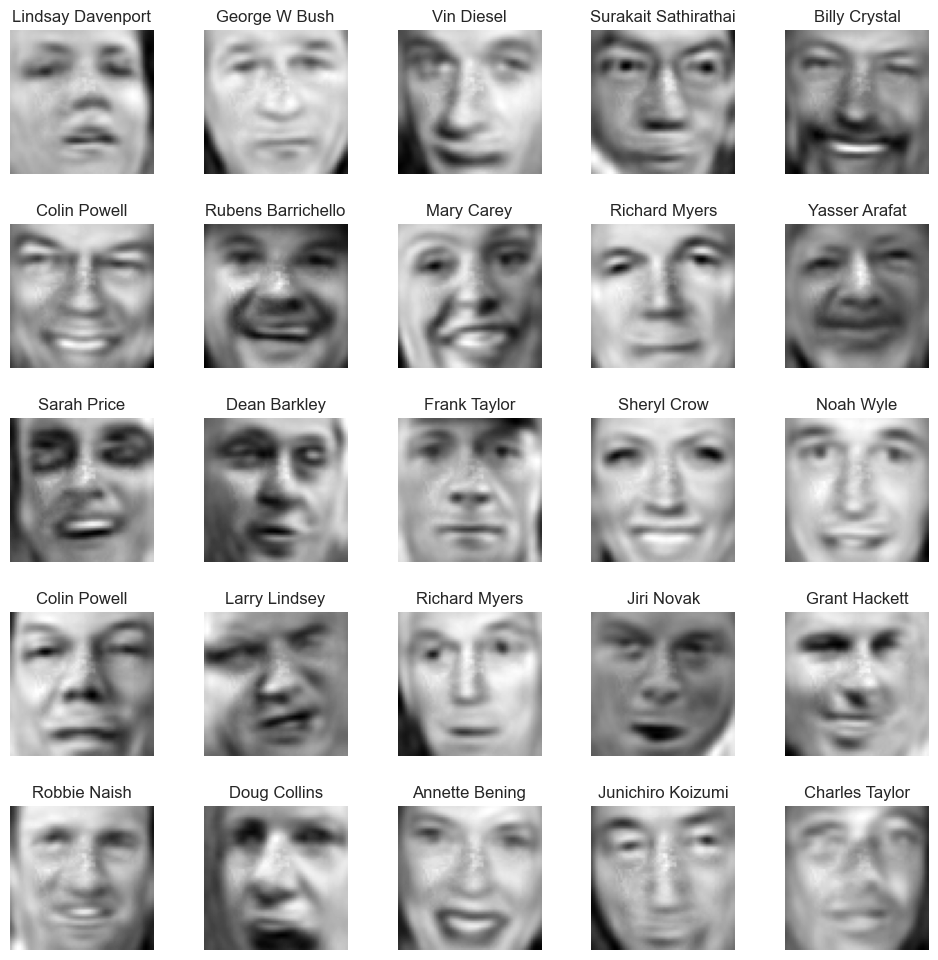

In [85]:
num_pcs_95 = face_pca.accounted_variance(0.95)
print("num_pcs_95: ", num_pcs_95)
reconstructed_data_95 = face_pca.pca_then_project_back(face_data, num_pcs_95)
inflated_imgs_95 = make_imgs(reconstructed_data_95)
face_plot(inflated_imgs_95, face_names)

### 4h. Questions

**Question 12:** What does the "mean face" image represent?

**Question 13:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Answer 12:** the "mean face" is the most average or typical face within the dataset. it is the average of every face in the dataset.

**Answer 13:** The face reconstruction shows us how different humans are. Each face at 50% variance looks the same, and still looks very similar to the mean. As we go up in accounted variance, we start to see more variety (obviously) in the faces. We can see the difference in detail easily between 50% and 95% variance. 95% is nearly the same as the regular pictures, with just a little bit of blur, and the 50% has already been described.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, loading plot, etc) to inform your analysis and exploration. 

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.